In [1]:
from simulator import Simulator
from network import Network
import numpy as np

from network import servers_csv_to_dict, pings_csv_to_dict

network = Network.from_dicts(pings_csv_to_dict("./../pings.csv"), servers_csv_to_dict("./../servers.csv"), fraction = 0.5)

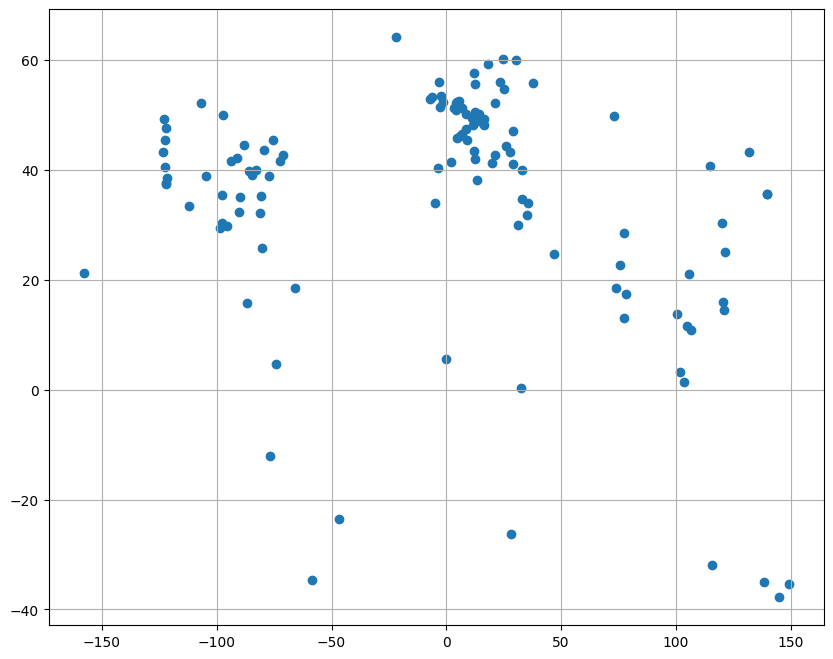

In [2]:
network.show_network()

### RandomWalk

In [3]:
from gossip_algorithm import RandomWalk

random_walk_simulator = Simulator(network=network, gossip_algorithm=RandomWalk(network))
random_walk_simulator.setup()

results, _  = random_walk_simulator.run(attackers = [])
print(results)


0.041666666666666664 0
0.08333333333333333 0
0.125 0
0.16666666666666666 0
0.20833333333333334 0
0.25 0
0.2916666666666667 0
0.3333333333333333 0
0.375 0
0.4166666666666667 0
0.4583333333333333 0
0.5 0
0.5416666666666666 0
0.5833333333333334 0
0.625 0
0.6666666666666666 0
0.7083333333333334 0
0.75 0
0.7916666666666666 0
0.8333333333333334 0
0.875 0
0.9166666666666666 0
0.9583333333333334 0
stretch debug
68.20076699338422 71.659
191.032372858063 159.25
254.99652561913024 183.131
327.0138059345144 193.214
529.4385106538487 50.703
575.7384817848574 31.104
738.1838965889781 187.519
931.714544816187 172.449
975.8195750135121 168.806
1171.6723307453829 50.329
1298.7008610450075 150.136
1341.996892788078 168.872
1581.2808044114215 47.805
1738.6258618743916 73.171
1951.9063420064522 200.635
3564.1656485214767 110.0
3883.1406660856924 197.684
3946.948969591483 138.416
4374.216030653568 162.931
6279.140354435501 13.135
8239.343779161334 129.69
11121.581900724985 139.62
12579.026738689556 176.931

## Cobra Walk

In [4]:
from gossip_algorithm import CobraWalk

cobra_walk_simulator = Simulator(network=network, gossip_algorithm=CobraWalk(network, rho = 0.8))
cobra_walk_simulator.setup()

results, _  = cobra_walk_simulator.run(attackers = [])
print(results)


0.041666666666666664 0
0.08333333333333333 1
0.125 2
0.16666666666666666 2
0.20833333333333334 3
0.25 5
0.2916666666666667 6
0.3333333333333333 7
0.375 8
0.4166666666666667 9
0.4583333333333333 10
0.5 11
0.5416666666666666 12
0.5833333333333334 13
0.625 14
0.6666666666666666 19
0.7083333333333334 23
0.75 27
0.7916666666666666 30
0.8333333333333334 34
0.875 34
0.9166666666666666 37
0.9583333333333334 48
stretch debug
322.8531279394003 306.39
495.9495768666799 152.479
602.2355600707266 46.431
602.9320154886003 45.994
652.2748311371321 35.717
665.2881076944317 83.797
690.5071939056724 40.044
720.68514877012 39.149
733.9143898119773 59.821
755.2814101996422 21.534
766.1738358312389 174.254
767.7802892685293 82.754
778.940147848605 187.698
788.7106216573022 196.09
799.1633869604768 135.149
844.1397649415246 196.546
889.9563119367285 175.617
925.5738269650062 157.305
934.8147944735368 115.135
955.1542035832608 15.213
955.9893258234001 208.177
961.7374694409461 41.504
1014.1681538542484 200.4

## Spatial Gossip

In [5]:
from gossip_algorithm import SpatialGossip

spatial_gossip_simulator = Simulator(network=network, gossip_algorithm=SpatialGossip(network, dimension = 2, rho = 1.1))
spatial_gossip_simulator.setup()

results, _  = spatial_gossip_simulator.run(attackers = [])
print(results)


0.041666666666666664 0
0.08333333333333333 0
0.125 0
0.16666666666666666 0
0.20833333333333334 0
0.25 0
0.2916666666666667 0
0.3333333333333333 0
0.375 0
0.4166666666666667 0
0.4583333333333333 0
0.5 0
0.5416666666666666 0
0.5833333333333334 0
0.625 0
0.6666666666666666 0
0.7083333333333334 0
0.75 0
0.7916666666666666 0
0.8333333333333334 0
0.875 0
0.9166666666666666 0
0.9583333333333334 0
stretch debug
21.720867984442517 19.11
64.97876934271517 42.754
151.61365671408083 90.091
264.5875028952491 80.716
761.6887852428837 43.993
948.9353979078522 31.323
967.0399170592287 27.505
1213.8489326064755 34.339
2037.2128946014443 47.022
2059.6365924150336 34.455
2238.290706365516 39.647
6470.494283900121 202.083
6585.476669814149 110.317
6625.898935494457 144.041
6706.520573362421 132.967
6797.397501459124 179.932
6879.908765610165 205.776
6956.916528424153 146.342
7519.666245023704 169.257
7548.343242421322 172.407
7561.491896143201 163.279
18967.760599982164 257.989
21262.41028152188 187.723
M

## Cobra Walk with Spatial Gossip

In [15]:
from gossip_algorithm import SpatialGossipWithCobraWalk

simulator = Simulator(network=network, gossip_algorithm=SpatialGossipWithCobraWalk(network, dimension = 2, rho = 1.1, cobra_walk_rho=0.8))
simulator.setup()

results, _  = simulator.run(attackers = [], msg_receival_limit = 40)
print(results)


0.008130081300813009 1
0.016260162601626018 2
0.024390243902439025 3
0.032520325203252036 4
0.04065040650406504 5
0.04878048780487805 5
0.056910569105691054 7
0.06504065040650407 9
0.07317073170731707 17
0.08130081300813008 27
0.08943089430894309 30
0.0975609756097561 72
0.10569105691056911 74
0.11382113821138211 84
0.12195121951219512 97
0.13008130081300814 116
0.13821138211382114 122
0.14634146341463414 123
0.15447154471544716 92
0.16260162601626016 86
0.17073170731707318 89
0.17886178861788618 90
0.18699186991869918 89
0.1951219512195122 87
0.2032520325203252 80
0.21138211382113822 84
0.21951219512195122 84
0.22764227642276422 86
0.23577235772357724 86
0.24390243902439024 84
0.25203252032520324 81
0.2601626016260163 80
0.2682926829268293 86
0.2764227642276423 111
0.2845528455284553 112
0.2926829268292683 117
0.3008130081300813 120
0.3089430894308943 123
0.3170731707317073 130
0.3252032520325203 134
0.3333333333333333 153
0.34146341463414637 157
0.34959349593495936 160
0.357723577235

## Hierarchical Gossip

In [24]:
from gossip_algorithm import HierarchialGossip

simulator = Simulator(network=network, gossip_algorithm=HierarchialGossip(network, fanout_intra = 5, fanout_inter = 1, num_clusters = 6))
simulator.setup()

results, _  = simulator.run(attackers = [], msg_receival_limit = 60)
print(results)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.008130081300813009 5
0.016260162601626018 10
0.024390243902439025 15
0.032520325203252036 25
0.04065040650406504 30
0.04878048780487805 35
0.056910569105691054 40
0.06504065040650407 50
0.07317073170731707 55
0.08130081300813008 60
0.08943089430894309 65
0.0975609756097561 70
0.10569105691056911 75
0.11382113821138211 85
0.12195121951219512 90
0.13008130081300814 110
0.13821138211382114 120
0.14634146341463414 125
0.15447154471544716 140
0.16260162601626016 145
0.17073170731707318 155
0.17886178861788618 170
0.18699186991869918 180
0.1951219512195122 185
0.2032520325203252 195
0.21138211382113822 200
0.21951219512195122 205
0.22764227642276422 210
0.23577235772357724 235
0.24390243902439024 260
0.25203252032520324 275
0.2601626016260163 295
0.2682926829268293 300
0.2764227642276423 305
0.2845528455284553 340
0.2926829268292683 390
0.3008130081300813 480
0.3089430894308943 485
0.3170731707317073 540
0.3252032520325203 575
0.3333333333333333 590
0.34146341463414637 705
0.34959349593495

In [8]:
all_nodes = [node.node_id for node in spatial_sim.network.nodes]

spatial_results, attacker_metric  = spatial_sim.run(attackers = create_random_attackers(LowestTimeEstimator, all_nodes, spatial_sim.first_source, 0.9, num_attackers = 20))
print(spatial_results)
print(attacker_metric)
# uniform_sim = Simulator(network=network, rho = 0, cobra_walk_rho=0.8, spatial_gossip=False)
# uniform_sim.setup()
# uniform_results = uniform_sim.run()

# print("Stretch \t Uniform \t\t Spatial")
# print("Mean \t\t", np.mean(uniform_results), "\t", np.mean(spatial_results))
# print("Median \t\t", np.median(uniform_results), "\t", np.median(spatial_results))
# print("Variance \t", np.var(uniform_results), "\t", np.var(spatial_results))
# print("Max \t\t", np.max(uniform_results), "\t", np.max(spatial_results))
# print("Min \t\t", np.min(uniform_results), "\t", np.min(spatial_results))



0.041666666666666664 0
0.08333333333333333 2
0.125 4
0.16666666666666666 4
0.20833333333333334 4
0.25 100
0.2916666666666667 369
0.3333333333333333 422
0.375 429
0.4166666666666667 614
0.4583333333333333 631
0.5 700
0.5416666666666666 883
0.5833333333333334 1288
0.625 3037
0.6666666666666666 3692
0.7083333333333334 7662
0.75 9791
0.7916666666666666 12372
0.8333333333333334 12948
0.875 73796
0.9166666666666666 275468
0.9583333333333334 962656
Mean: 3.280531511635093 | Median: 3.146448399280818 | Max: 10.837505362094142 | Min: 1.0474726845321265
Mean: 0.05 | Median: 0.0 | Max: True | Min: False


In [29]:
print(spatial_results)
print(attacker_metric)

Mean: 2.70403042233116 | Median: 2.555058469072454 | Max: 5.205846587032541 | Min: 0.7963037729195638
Mean: 0.05 | Median: 0.0 | Max: True | Min: False


1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10


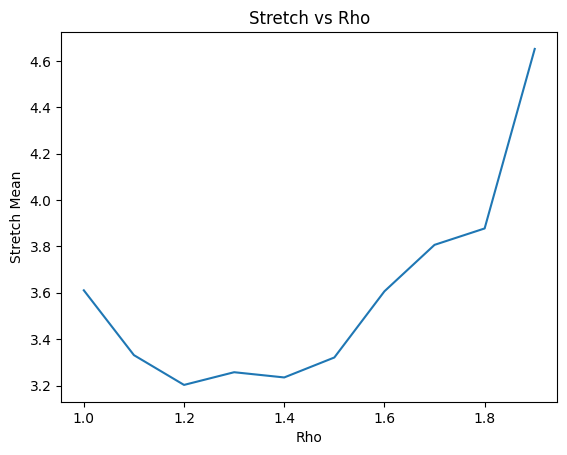

Rho 	 Mean 			 Median 		 Variance 		 Max 			 Min
1.0 	 3.610485574015378 	 2.644790932112259 	 16.295079511531114 	 115.39983578271199 	 1.001474301479578
1.1 	 3.330949171741424 	 2.561967793446555 	 9.039011187123515 	 89.1535205836205 	 1.0008362995664521
1.2 	 3.2025344981852153 	 2.5199320794177216 	 6.947797166205205 	 73.52643188066887 	 1.0010420334261434
1.3 	 3.2572983486455693 	 2.6631702389038923 	 5.554135889957354 	 44.60594180338766 	 1.0005852265066686
1.4 	 3.23478226640556 	 2.712209493885295 	 4.6268588515920674 	 42.253989210180684 	 1.0014544572321225
1.5 	 3.320787549531956 	 2.7550510076229964 	 5.021635263726073 	 39.71198830693792 	 1.0007465871483192
1.6 	 3.6061359655079523 	 2.9780987084984467 	 7.556533936640187 	 78.201664943961 	 1.0009722682769835
1.7 	 3.80644697776468 	 3.2466321319329396 	 5.405367613674317 	 31.344339356044067 	 1.0000911828341348
1.8 	 3.8772093386817663 	 3.3600564330489395 	 5.619871665067429 	 33.061023878687266 	 1.0003181596093

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from simulator import Simulator
from network import Network
from node import Node
from position import Euclidean2D

# network = Network(num_nodes = 50, grid_size=100)
network = Network([Node(node_id=0, pos=Euclidean2D(71, 43)), Node(node_id=1, pos=Euclidean2D(34, 84)), Node(node_id=2, pos=Euclidean2D(42, 95)), Node(node_id=3, pos=Euclidean2D(45, 20)), Node(node_id=4, pos=Euclidean2D(30, 20)), Node(node_id=5, pos=Euclidean2D(64, 83)), Node(node_id=6, pos=Euclidean2D(2, 49)), Node(node_id=7, pos=Euclidean2D(52, 81)), Node(node_id=8, pos=Euclidean2D(35, 58)), Node(node_id=9, pos=Euclidean2D(77, 11)), Node(node_id=10, pos=Euclidean2D(42, 46)), Node(node_id=11, pos=Euclidean2D(60, 51)), Node(node_id=12, pos=Euclidean2D(87, 89)), Node(node_id=13, pos=Euclidean2D(78, 61)), Node(node_id=14, pos=Euclidean2D(50, 46)), Node(node_id=15, pos=Euclidean2D(4, 57)), Node(node_id=16, pos=Euclidean2D(5, 31)), Node(node_id=17, pos=Euclidean2D(85, 40)), Node(node_id=18, pos=Euclidean2D(67, 18)), Node(node_id=19, pos=Euclidean2D(1, 81)), Node(node_id=20, pos=Euclidean2D(84, 98)), Node(node_id=21, pos=Euclidean2D(91, 89)), Node(node_id=22, pos=Euclidean2D(12, 7)), Node(node_id=23, pos=Euclidean2D(20, 98)), Node(node_id=24, pos=Euclidean2D(50, 73)), Node(node_id=25, pos=Euclidean2D(15, 80)), Node(node_id=26, pos=Euclidean2D(20, 53)), Node(node_id=27, pos=Euclidean2D(35, 61)), Node(node_id=28, pos=Euclidean2D(66, 83)), Node(node_id=29, pos=Euclidean2D(62, 73)), Node(node_id=30, pos=Euclidean2D(54, 63)), Node(node_id=31, pos=Euclidean2D(52, 55)), Node(node_id=32, pos=Euclidean2D(96, 44)), Node(node_id=33, pos=Euclidean2D(31, 13)), Node(node_id=34, pos=Euclidean2D(92, 19)), Node(node_id=35, pos=Euclidean2D(44, 95)), Node(node_id=36, pos=Euclidean2D(46, 76)), Node(node_id=37, pos=Euclidean2D(9, 5)), Node(node_id=38, pos=Euclidean2D(9, 70)), Node(node_id=39, pos=Euclidean2D(77, 33)), Node(node_id=40, pos=Euclidean2D(66, 69)), Node(node_id=41, pos=Euclidean2D(64, 97)), Node(node_id=42, pos=Euclidean2D(97, 26)), Node(node_id=43, pos=Euclidean2D(17, 0)), Node(node_id=44, pos=Euclidean2D(29, 68)), Node(node_id=45, pos=Euclidean2D(29, 21)), Node(node_id=46, pos=Euclidean2D(92, 13)), Node(node_id=47, pos=Euclidean2D(54, 61)), Node(node_id=48, pos=Euclidean2D(8, 58)), Node(node_id=49, pos=Euclidean2D(52, 24))])
# print(network.nodes)
# network.show_network()
spatial_results = []
for i, rho in enumerate(np.arange(1, 2, 0.1)):
    print(f"{i+1} of {len(np.arange(1, 2, 0.1))}")
    runs_results = []
    for run in range(100):
        spatial_sim = Simulator(network=network, rho = rho, cobra_walk_rho=0.8, spatial_gossip=True)
        spatial_sim.setup()
        runs_results.append(spatial_sim.run())
    spatial_results.append([run_result for run in runs_results for run_result in run])

plt.plot(np.arange(1, 2, 0.1), [np.mean(x) for x in spatial_results])
plt.xlabel("Rho")
plt.ylabel("Stretch Mean")
plt.title("Stretch vs Rho")
plt.show()

#print table with mean, median, variance, max, min for each rho
print("Rho \t Mean \t\t\t Median \t\t Variance \t\t Max \t\t\t Min")
for i in range(len(spatial_results)):
    print(f"{(1*10+i)/10} \t {np.mean(spatial_results[i])} \t {np.median(spatial_results[i])} \t {np.var(spatial_results[i])} \t {np.max(spatial_results[i])} \t {np.min(spatial_results[i])}")